In [29]:
import numpy as np
import momentfm
import matplotlib.pyplot as plt

/gpt/data3/KURC/users/makamx0a/venvs/moment/lib/python3.11/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [6]:
import torch

In [10]:
def list_cuda_devices():
    if not torch.cuda.is_available():
        print("CUDA is not available.")
        return

    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices: {num_devices}")

    for i in range(num_devices):
        device_name = torch.cuda.get_device_name(i)
        print(f"Device {i}: {device_name}")     

list_cuda_devices()

Number of CUDA devices: 4
Device 0: NVIDIA H100 80GB HBM3
Device 1: NVIDIA H100 80GB HBM3
Device 2: NVIDIA H100 80GB HBM3
Device 3: NVIDIA H100 80GB HBM3


In [14]:
processed_logs = '/gpt/data3/KURC/users/kovaledx/data/alpha/logs_tokenized/data_processed_512_standard_Aramco'
import os, glob
logs = glob.glob(processed_logs+'/*.pt')

In [25]:
torch.load(logs[0])['label'][:10,0], torch.load(logs[0])['depth_input'][:10]

(tensor([-0.3439, -0.2770, -0.2572, -0.2765, -0.2712, -0.2417, -0.2425, -0.3017,
         -0.3713, -0.3897]),
 array([12854. , 12854.5, 12855. , 12855.5, 12856. , 12856.5, 12857. ,
        12857.5, 12858. , 12858.5]))

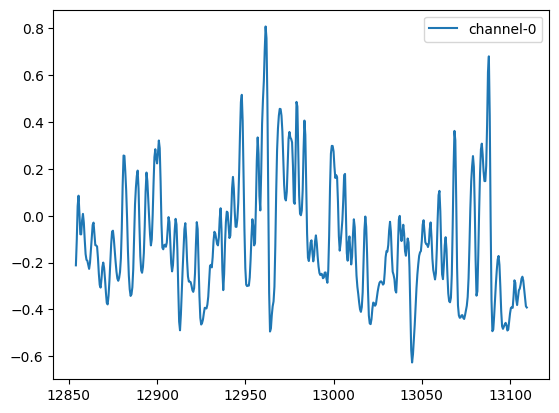

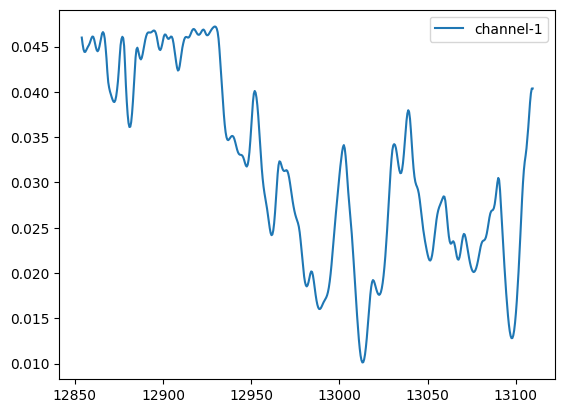

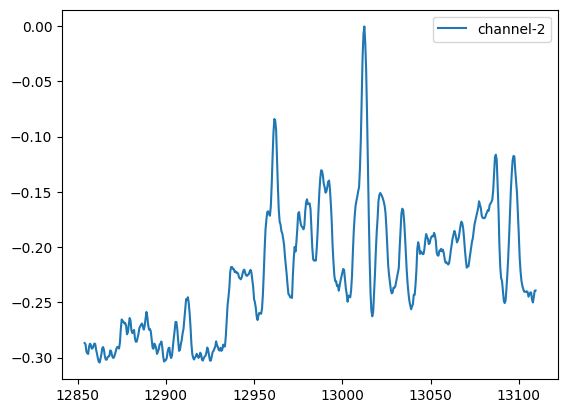

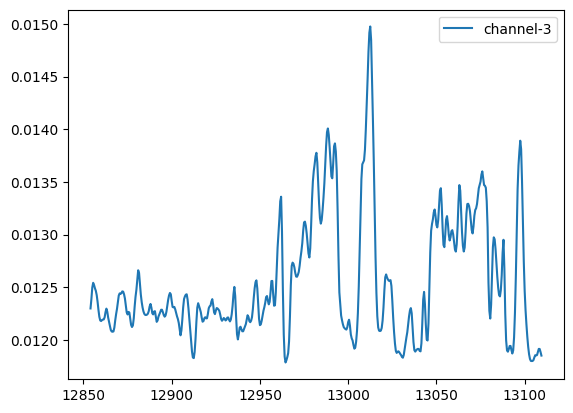

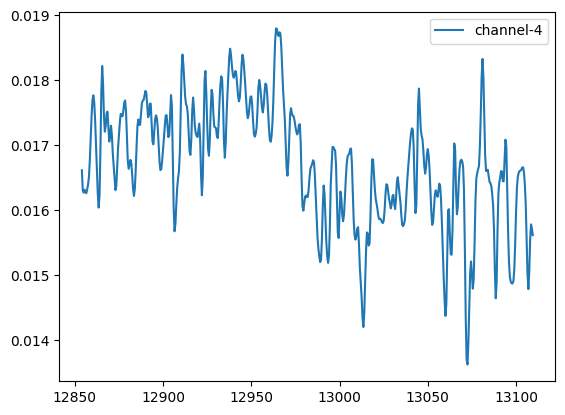

In [37]:
idx = 0
log = torch.load(logs[idx])['input'].numpy()
depth = torch.load(logs[idx])['depth_input']
seq_len, n_channels = log.shape
for i in range(n_channels):
    plt.figure()
    plt.plot(depth, log[:, i], label=f'channel-{i}')
    plt.legend()
    plt.show()

In [43]:
import pandas as pd
def read_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    
    # Set the first row as the header
    df.columns = df.iloc[0]
    
    # Drop the first row as it is now the header
    df = df[1:]
    
    return df

pd.read_csv('/gpt/data3/KURC/users/kovaledx/data/ailog/Aramco_well_780-612_st_59101415.csv', index_col=0)

,well,DEPTH,Gamma,TOPS,BIT,INC,ROP,RPM,TOR,TPO,SPP,WOB,MW,MSE1,DTCO,DTSM,RHOB,DTCO_predicted,DTSM_predicted,RHOB_predicted
0,Aramco_well_780-612_QC2_st,4370.5,25.5037,1.751146,12.25,0.460000,0.453677,80.0000,7614.20625,809.318906,1881.892063,17.330669,11.362847,0.147046,NaN,NaN,NaN,75.231700,147.36931,2.496266
1,Aramco_well_780-612_QC2_st,4371.0,25.8134,1.751604,12.25,0.460000,0.329052,79.2500,7684.75625,808.843263,1855.774500,16.512629,11.362847,0.140105,NaN,NaN,NaN,75.059340,146.65027,2.496436
2,Aramco_well_780-612_QC2_st,4371.5,25.2539,1.752062,12.25,0.460000,0.616440,80.0000,7726.22500,808.812244,1792.830937,13.476306,11.362847,0.114343,NaN,NaN,NaN,75.952730,149.65630,2.497246
3,Aramco_well_780-612_QC2_st,4372.0,25.3149,1.752521,12.25,0.460000,0.649100,79.1250,7300.48125,811.965206,1756.536500,15.812702,11.362847,0.134166,NaN,NaN,NaN,76.774310,152.25052,2.495416
4,Aramco_well_780-612_QC2_st,4372.5,25.8533,1.752979,12.25,0.460000,0.327144,79.4375,7348.53125,808.225181,1730.005562,19.302292,11.362847,0.163775,NaN,NaN,NaN,78.580570,157.76663,2.494490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,Aramco_well_780-612_QC2_st,6242.5,79.6330,11.990085,8.50,0.237373,1.360891,42.0000,7181.30000,503.612225,2635.487250,4.912888,11.095486,0.086578,93.4147,217.4381,2.5195,95.281906,194.30235,2.456928
3745,Aramco_well_780-612_QC2_st,6243.0,81.6628,11.991501,8.50,0.236610,1.366514,42.0000,7193.82500,503.646250,2534.982500,0.939816,11.095486,0.016562,96.7254,221.3332,2.5243,96.246605,198.12662,2.463865
3746,Aramco_well_780-612_QC2_st,6243.5,80.9669,11.992918,8.50,0.235847,1.360150,42.0000,7262.92500,503.829125,2607.882000,1.664127,11.095486,0.029326,99.3543,225.1573,2.5321,96.383180,198.59744,2.462535
3747,Aramco_well_780-612_QC2_st,6244.0,81.2713,11.994334,8.50,0.235085,1.372903,42.5000,7327.08125,503.581250,2634.289375,2.408782,11.095486,0.042449,100.4919,227.8590,2.5241,96.023240,197.29788,2.462536


In [44]:
import pickle, yaml


In [46]:
with open('/gpt/data3/KURC/users/kovaledx/alphatools/logs_processed/data_processed_512_standard_Aramco/0.pkl', 'rb') as file:
    data = pickle.load(file)

In [47]:
data

,WELL,DEPTH,GR,RDEP,DTC,NPHI,RHOB
0,0,14191.0,0.286169,0.026870,0.049128,0.014331,0.014900
1,0,14191.5,0.416494,0.013826,0.063176,0.014308,0.014912
2,0,14192.0,0.523705,0.008089,0.045074,0.013972,0.015121
3,0,14192.5,0.485188,0.008211,-0.023893,0.013472,0.015219
4,0,14193.0,0.285685,0.010968,-0.075185,0.012948,0.015608
...,...,...,...,...,...,...,...
1856,0,15119.0,4.839379,0.027643,-0.011903,0.012829,0.015775
1857,0,15119.5,5.003544,0.028193,-0.019765,0.012864,0.015860
1858,0,15120.0,4.813762,0.028646,-0.010456,0.012881,0.015959
1859,0,15120.5,4.326414,0.028859,0.003141,0.012831,0.015987
